### 1. Treinar com p=2%

### 2. Melhoria nos augmentation
 - Crop nas imagens, como na predicao e validacao
 - random crop
 
### 3. Otimizacao dos valores de LR inicial
 - treinar a primeira epoca e verificar o melhor LR
 - verificar para os tres casos, teacher finetune e pseudolabels

### 4. Otimizar o fator k_best na geracao de pseudolabels
 - nao necessariamente 50%
 - pode variar para as diferentes particoes
 
### 5. Repetir os experimentos
 - com os valores encontrados, mais data augmentation, etc

### 6. Reduzir o tamanho inicial do conjunto para 10%
 - 20% de 10%, 10% de 10%, 5% de 10%, 2% de 10%
 - mesmos experimentos

### 7. Escrever um artigo

### 8. Realizar os experimentos para outra patologia (futuramente)
 - sem necessariamente a reducao do conjunto

### center crop com 224
### translate = 6.25%
### scale = 5%
### rotate = 15'
+ random perspective leve

In [1]:
164-(2.6+7+1.5+3.75+8+33)

108.15

In [1]:
import os
import sys
#os.chdir('./ChexNet')
os.getcwd()

'/home/roberto/Documents/CheXNet'

In [2]:
import numpy as np
from torchvision.transforms import transforms

In [3]:
total = 50_000

train5 = 5_000   # rotulado
train95 = 45_000 # nao rotulado

total_validacao = 7371
total_teste = 22_000

In [4]:
from packaging import version
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [5]:
def tb_tags(path):
    ea = EventAccumulator(path)
    ea.Reload()
    return ea.Tags()['scalars']
    
def tb_values(path, tag):
    ea = EventAccumulator(path)
    ea.Reload()
    times, steps, vals = zip(*ea.Scalars(tag))
    return times, steps, vals

In [6]:
fullrun_dir = '/home/roberto/Dropbox/SSL_Chexnet_training_data/mestrado_backup/runs k=0.75 strong/effusion_train_full/'
fullrun_tag = 'auroc/validation'

# Treinamento particao 20%

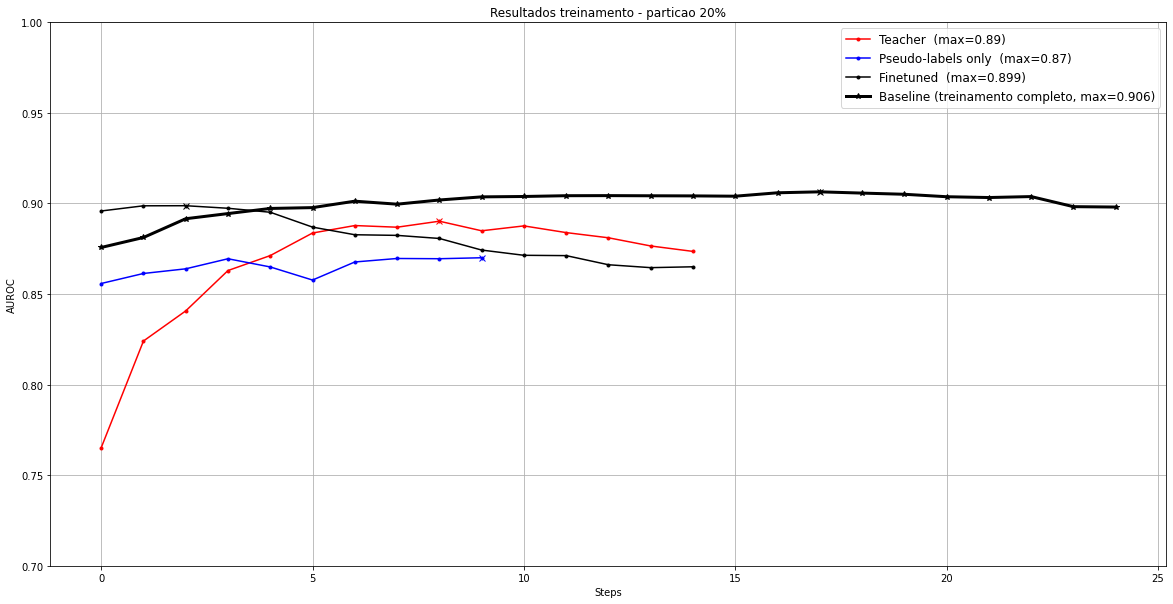

In [7]:
teacher  = 'runs/effusion_train20%_teacher_00'
pseudo   = 'runs/effusion_train20%_pseudolabels_00'
finetune = 'runs/effusion_train20%_finetune_original_00'


#for folder in [teacher, pseudo, finetune]:
#    print(tb_tags(folder))

data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')
data_full_train = tb_values(fullrun_dir, fullrun_tag)

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.7,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 20%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_newrun/auroc_20%_partition.png')

# Treinamento partição 10%

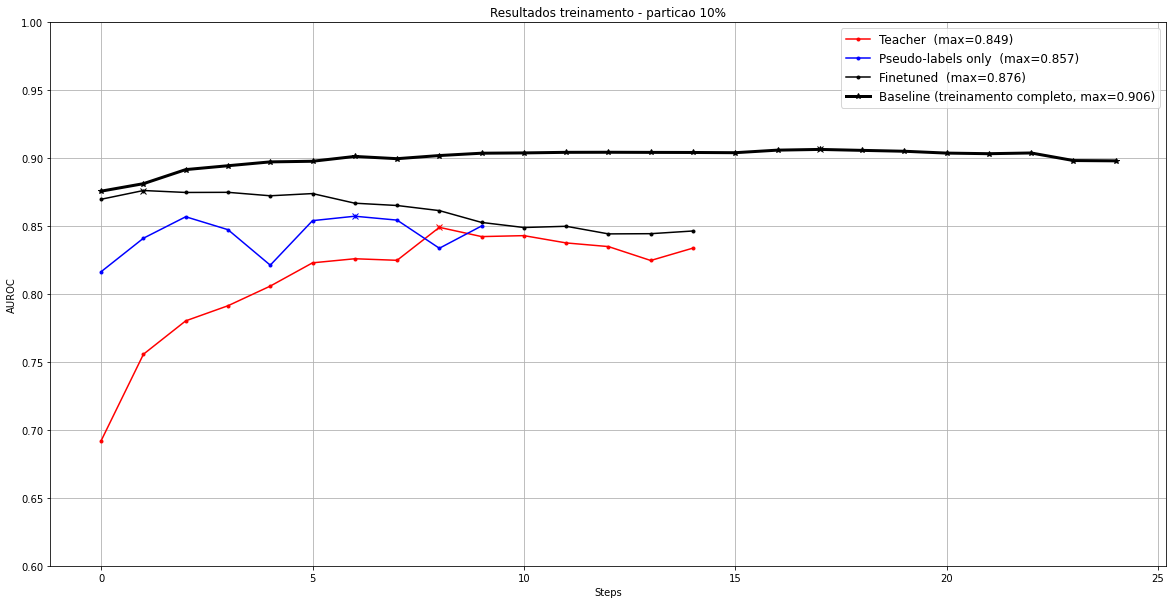

In [9]:
# 10%

teacher  = 'runs/effusion_train10%_teacher_00'
pseudo   = 'runs/effusion_train10%_pseudolabels_00'
finetune = 'runs/effusion_train10%_finetune_original_00'


#for folder in [teacher, pseudo, finetune]:
#    print(tb_tags(folder))


data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')
data_full_train = tb_values(fullrun_dir, fullrun_tag)

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')
    
plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 10%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_newrun/auroc_10%_partition.png')

# Treinamento partição 5%

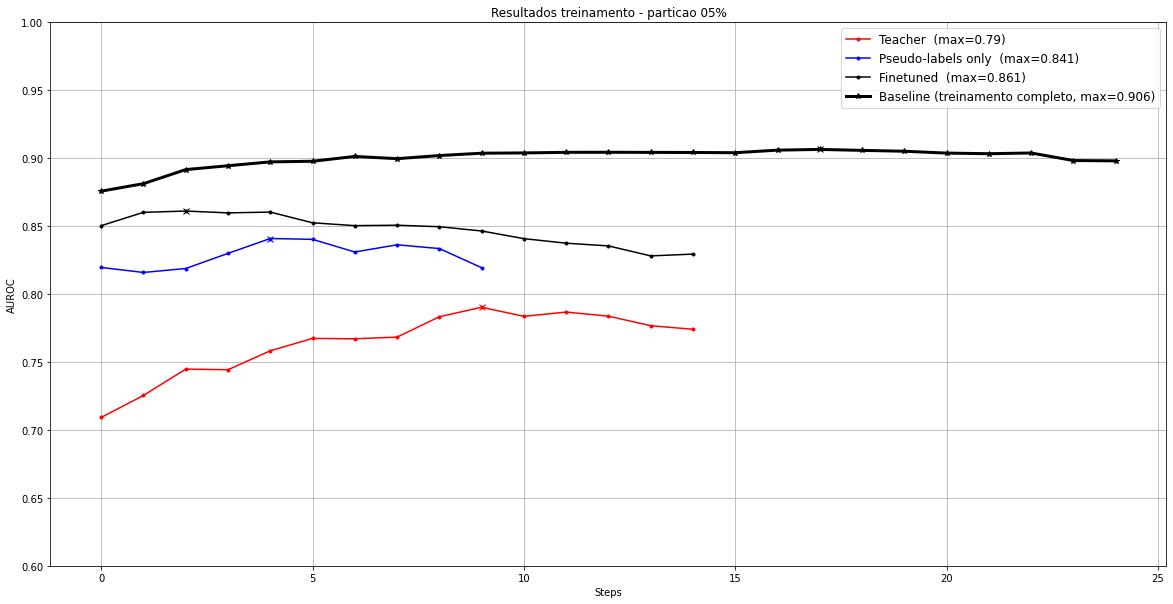

In [10]:
# 05%

teacher  = 'runs/effusion_train05%_teacher_00'
pseudo   = 'runs/effusion_train05%_pseudolabels_00'
finetune = 'runs/effusion_train05%_finetune_original_00'


#for folder in [teacher, pseudo, finetune]:
#    print(tb_tags(folder))


data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')
data_full_train = tb_values(fullrun_dir, fullrun_tag)

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 05%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_newrun/auroc_05%_partition.png')

# Treinamento particao 2%

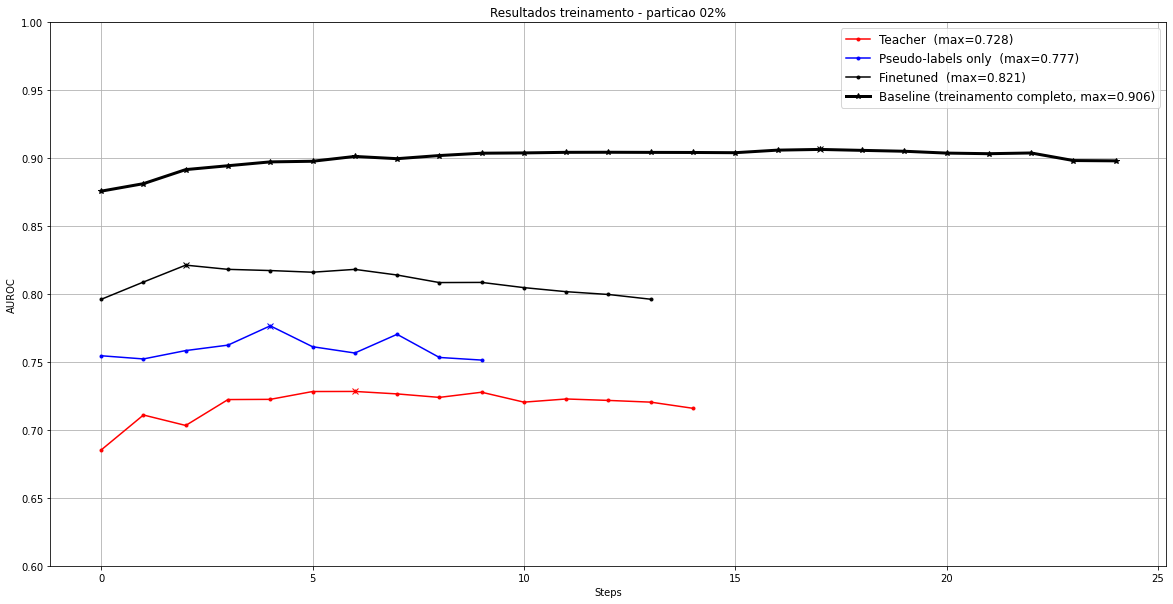

In [11]:
# 2%

teacher  = 'runs/effusion_train02%_teacher_00'
pseudo   = 'runs/effusion_train02%_pseudolabels_00'
finetune = 'runs/effusion_train02%_finetune_original_00'


#for folder in [teacher, pseudo, finetune]:
#    print(tb_tags(folder))


data_teacher = tb_values(teacher, 'auroc/validation')
data_pseudo = tb_values(pseudo, 'auroc/validation')
data_finetune = tb_values(finetune, 'auroc/validation')



plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

for data, c, l in zip([data_teacher, data_pseudo, data_finetune],
                      ['r', 'b', 'k'],
                      ['Teacher', 'Pseudo-labels only', 'Finetuned']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 3)})')    
    plt.plot(amax, data[2][amax], c+'x')

    
data_full_train = tb_values(fullrun_dir, fullrun_tag)
amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')


plt.legend(fontsize='large')
plt.title('Resultados treinamento - particao 02%')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname='./images_newrun/auroc_02%_partition.png')

# Comparação Teachers (20% vs 10% vs 5% vs 2%)

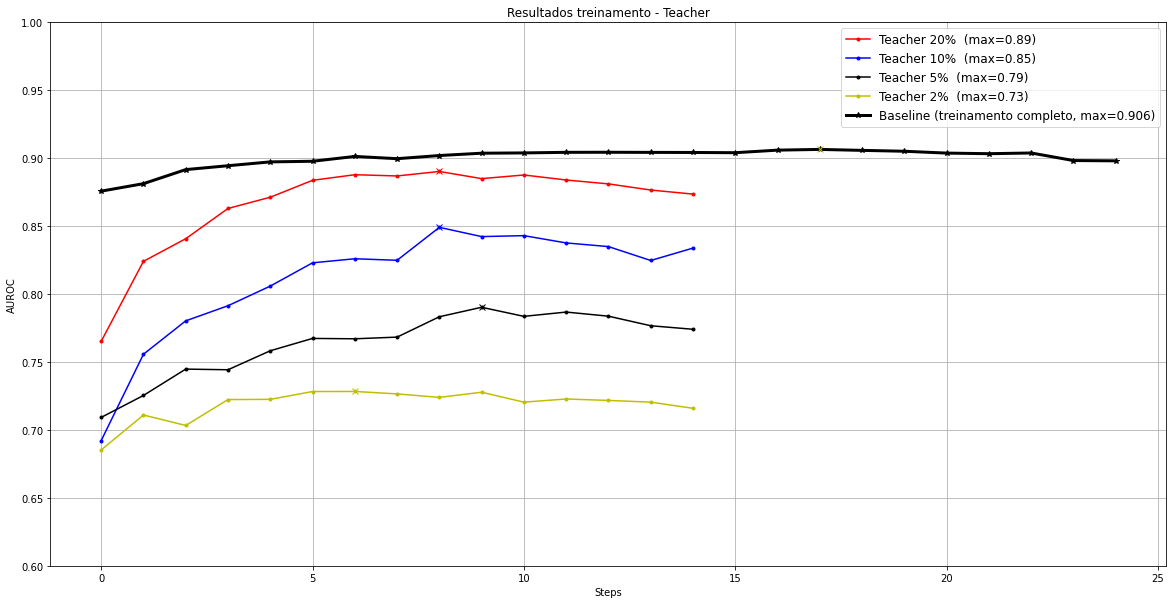

In [12]:
# comparacao teachers
training_data = []
for p in ['20', '10', '05', '02']:
    training_data.append(tb_values(f'runs/effusion_train{p}%_teacher_00', 'auroc/validation'))

plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.6,1])

runtype = 'Teacher'
for data, c, l in zip(training_data,
                      ['r', 'b', 'k', 'y'],
                      [f'{runtype} 20%',f'{runtype} 10%', f'{runtype} 5%', f'{runtype} 2%']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max={round(data[2][amax], 2)})')    
    plt.plot(amax, data[2][amax], c+'x')
    
    
data_full_train = tb_values(fullrun_dir, fullrun_tag)
amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images_newrun/comparison_teachers.png')

# Comparação pseudolabels

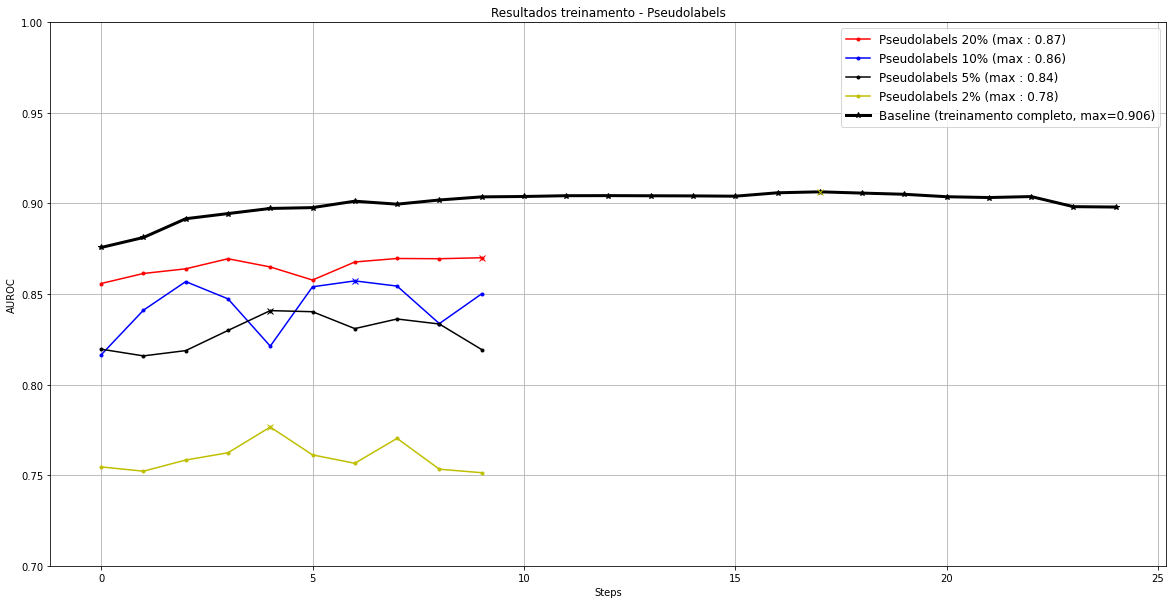

In [13]:
# comparacao pseudolabels
runtype = 'Pseudolabels'
training_data = []
for p in ['20', '10', '05', '02']:
    training_data.append(tb_values(f'runs/effusion_train{p}%_pseudolabels_00', 'auroc/validation'))


plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.7,1])


for data, c, l in zip(training_data,
                      ['r', 'b', 'k', 'y'],
                      [f'{runtype} 20%',f'{runtype} 10%', f'{runtype} 5%', f'{runtype} 2%']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f' (max : {round(data[2][amax], 2)})')    
    plt.plot(amax, data[2][amax], c+'x')

    
data_full_train = tb_values(fullrun_dir, fullrun_tag)
amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

    
plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images_newrun/comparison_pseudolabels.png')

# Comparação finetune students

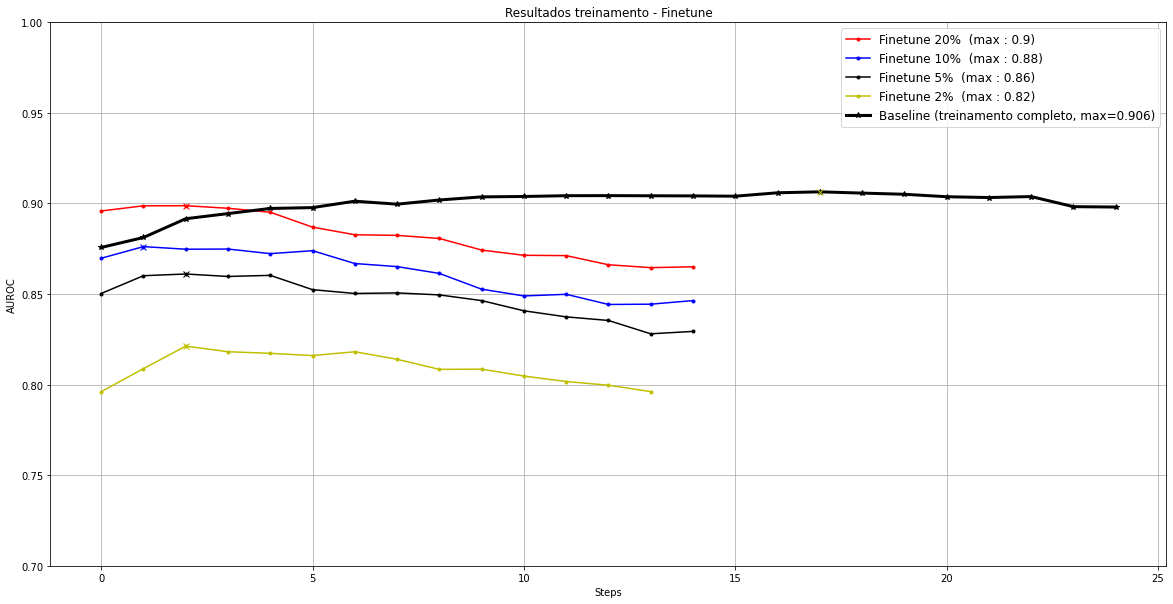

In [14]:
# comparacao students
runtype = 'Finetune'
training_data = []
for p in ['20', '10', '05', '02']:
    training_data.append(tb_values(f'runs/effusion_train{p}%_finetune_original_00', 'auroc/validation'))


plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.7,1])

for data, c, l in zip(training_data,
                      ['r', 'b', 'k', 'y'],
                      [f'{runtype} 20%',f'{runtype} 10%', f'{runtype} 5%', f'{runtype} 2%']):
    amax = np.argmax(data[2])
    plt.plot(data[2], '-'+c+'.', label=l + f'  (max : {round(data[2][amax], 2)})')    
    plt.plot(amax, data[2][amax], c+'x')

data_full_train = tb_values(fullrun_dir, fullrun_tag)
amax = np.argmax(data_full_train[2])
plt.plot(data_full_train[2], '-k*', linewidth=3.0, label=f"Baseline (treinamento completo, max={round(data_full_train[2][amax], 3)})")
plt.plot(amax, data_full_train[2][amax], c+'x')

plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - {runtype}')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images_newrun/comparison_finetune.png')

# Comparação Augmentations

## Teacher

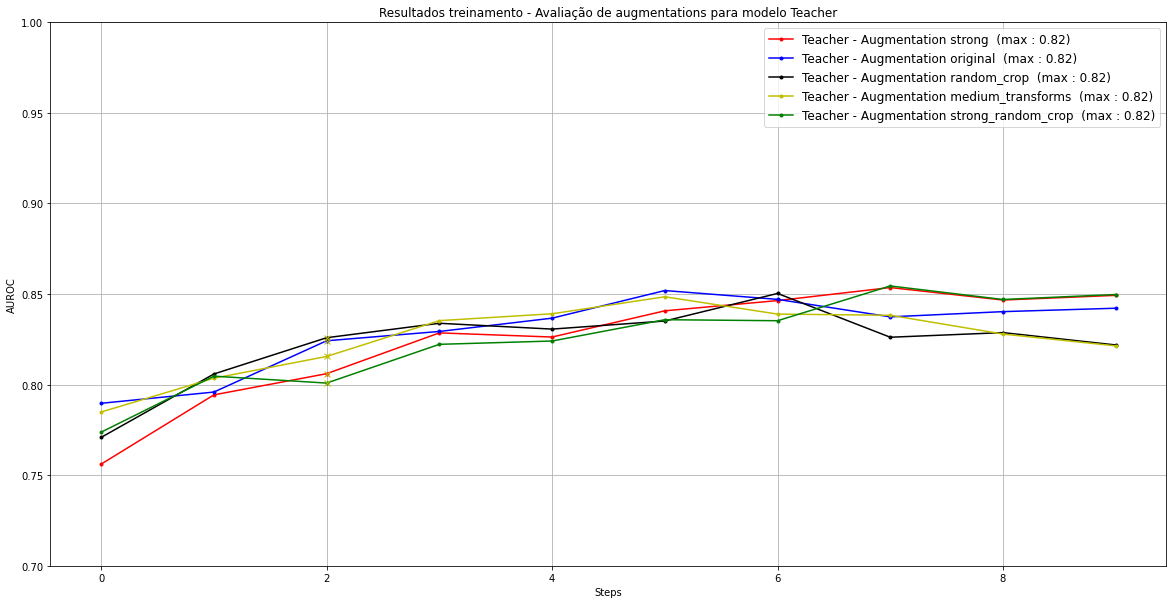

In [15]:
# comparacao augmentations
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.7,1])
lines = ['r','b','k','y','g','g']
for i,method in enumerate(["strong", "original", "random_crop", "medium_transforms", "strong_random_crop"]):
    training_data = tb_values(f'runs/effusion_train10%_teacher_augmentation_{method}', 'auroc/validation')
    label = f"Teacher - Augmentation {method}"
    line = lines[i]
    amax = np.argmax(data[2])
    plt.plot(training_data[2], '-'+line+'.', label=label + f'  (max : {round(data[2][amax], 2)})')    
    plt.plot(amax, training_data[2][amax], c+'x')    
plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - Avaliação de augmentations para modelo Teacher')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images_newrun/comparison_augmentations_teacher.png')

# Pseudolabels

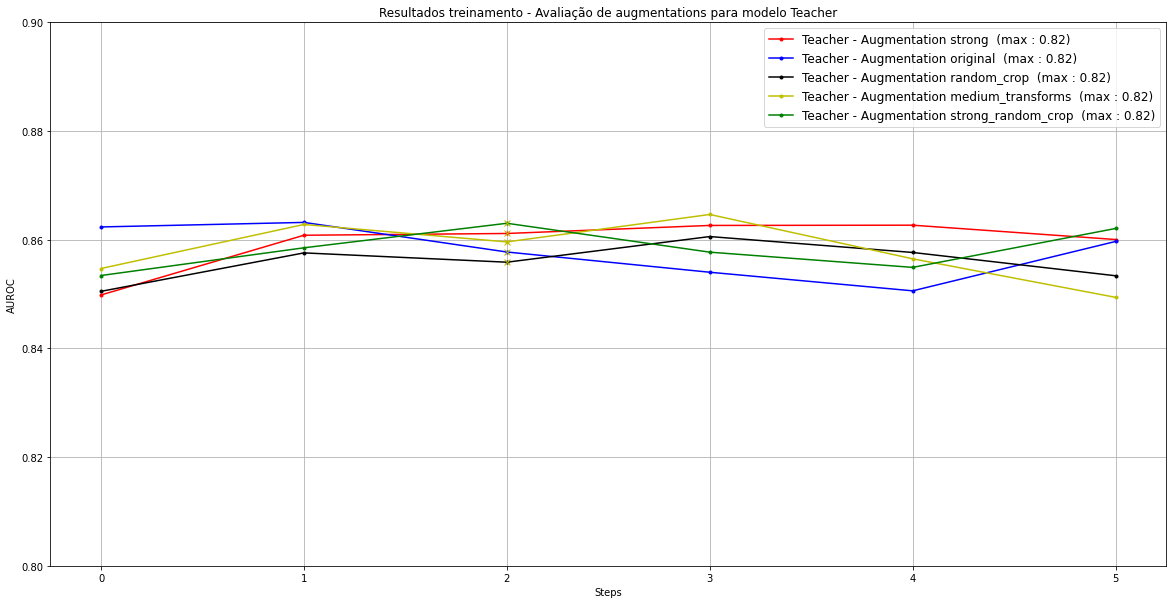

In [16]:
# comparacao augmentations
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.8,0.9])
lines = ['r','b','k','y','g','g']
for i,method in enumerate(["strong", "original", "random_crop", "medium_transforms", "strong_random_crop"]):
    training_data = tb_values(f'runs/effusion_train10%_pseudolabels_augmentation_{method}', 'auroc/validation')
    label = f"Teacher - Augmentation {method}"
    line = lines[i]
    amax = np.argmax(data[2])
    plt.plot(training_data[2], '-'+line+'.', label=label + f'  (max : {round(data[2][amax], 2)})')    
    plt.plot(amax, training_data[2][amax], c+'x')    
plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - Avaliação de augmentations para modelo Teacher')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images_newrun/comparison_augmentation_pseudolabels.png')

# Student

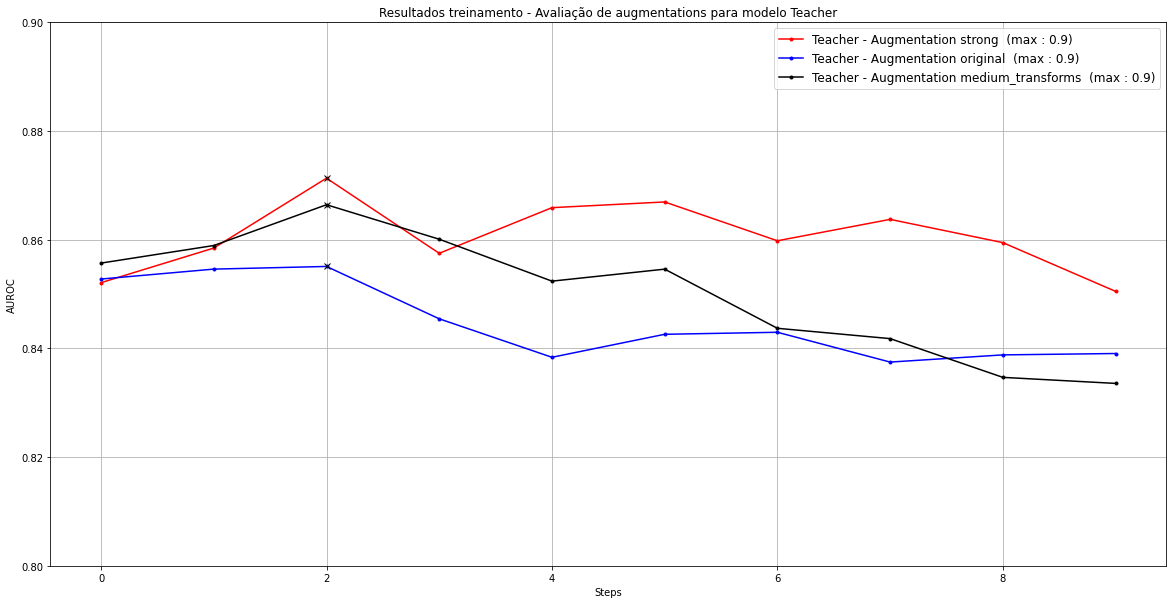

In [9]:
import tikzplotlib
# comparacao augmentations
plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.8,0.9])
lines = ['r','b','k','y','g','g']
for i,method in enumerate(["strong", "original", "medium_transforms"]):
    training_data = tb_values(f'runs/effusion_train10%_finetune_augmentation_{method}', 'auroc/validation')
    label = f"Teacher - Augmentation {method}"
    line = lines[i]
    amax = np.argmax(data[2])
    plt.plot(training_data[2], '-'+line+'.', label=label + f'  (max : {round(data[2][amax], 2)})')    
    plt.plot(amax, training_data[2][amax], c+'x')    
plt.legend(fontsize='large')
plt.title(f'Resultados treinamento - Avaliação de augmentations para modelo Teacher')
plt.xlabel('Steps')
plt.ylabel('AUROC')
plt.savefig(fname=f'./images_newrun/comparison_augmentation_student.png')
tikzplotlib.save('./paper_images/augmentations_student.tex')

# Comparação finetune 2% e 5% vs teacher 10% e 20%

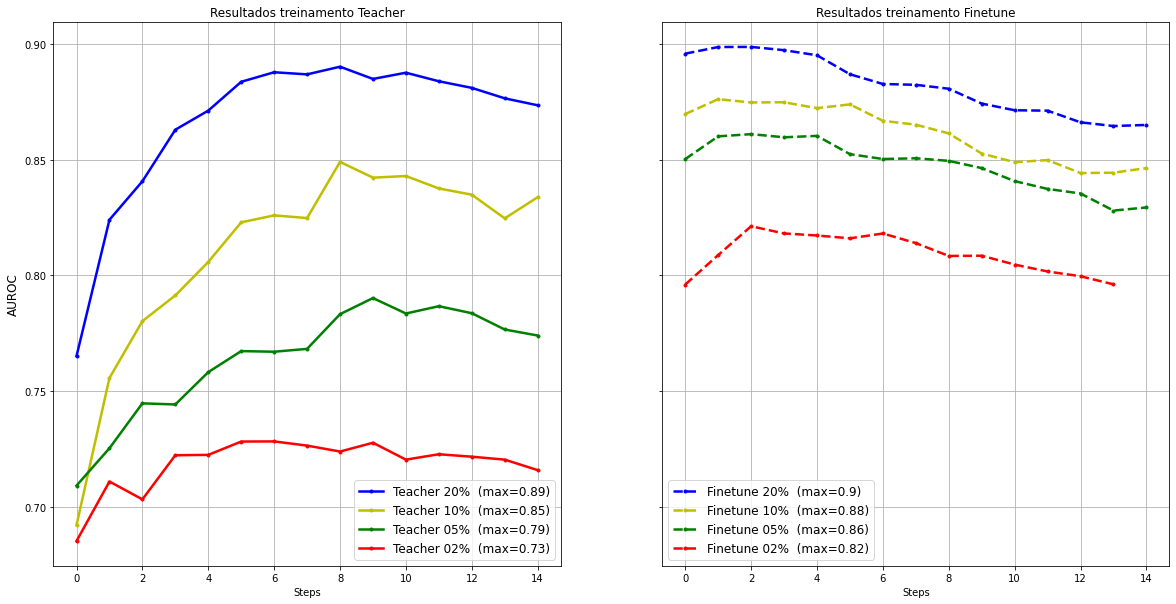

In [18]:
#plt.figure(figsize=(20,10)), plt.grid(which='major'), plt.ylim([0.65,0.95])

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(20,10),)

# Data for teachers
colors = ['r','g','y','b']
legends = []
for p in ['20', '10','05','02']:
    data = tb_values(f'runs/effusion_train{p}%_teacher_00', 'auroc/validation')
    c = colors.pop()
    l = f"Teacher {p}%"
    amax = np.argmax(data[2])
    ax1.plot(data[2], '-'+c+'.', linewidth=2.5)    
    legends.append(l+f'  (max={round(data[2][amax], 2)})')
    #ax1.plot(amax, data[2][amax], c+'x')
ax1.legend(legends, fontsize='large')
ax1.grid()

colors = ['r','g','y','b']
legends = []
for p in ['20', '10', '05','02']:
    data = tb_values(f'runs/effusion_train{p}%_finetune_original_00', 'auroc/validation')
    c = colors.pop()
    l = f"Finetune {p}%"
    amax = np.argmax(data[2])
    ax2.plot(data[2], '--'+c+'.', linewidth=2.5)
    #ax2.plot(amax, data[2][amax], c+'x')
    legends.append(l + f'  (max={round(data[2][amax], 2)})')
ax2.legend(legends, fontsize='large')
ax2.grid()

data_full_train = tb_values(fullrun_dir, fullrun_tag)
amax = np.argmax(data_full_train[2])


#plt.legend(fontsize='large')
ax1.set_title(f'Resultados treinamento Teacher')
ax2.set_title(f'Resultados treinamento Finetune')
ax1.set_xlabel('Steps')
ax2.set_xlabel('Steps')
ax1.set_ylabel('AUROC',  fontsize='large')
plt.savefig(fname=f'./images_newrun/comparison_finetune_vs_teacher.png')